In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/credit_card_fraud.csv')
print(df.shape)
df.head()

(8000, 20)


,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,NaN,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,NaN,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


In [4]:
# Dropping columns we won't use as they are either obfuscated or of little interest.
df.drop(
    columns=[
        'Cardholder Name',
        'Card Number (Hashed or Encrypted)',
        'CVV Code (Hashed or Encrypted)',
        'Transaction ID',
        'IP Address',
        'Transaction Notes',
        'User Account Information' ],
    inplace=True,
    errors='ingore'
)

# Giving columns more concise names, allowing us to access via .notation
df.rename(
    columns={
        'Transaction Date and Time'                 : 'datetime',
        'Transaction Amount'                        : 'amount',
#        'Cardholder Name'                           : 'cardholder',
        'Merchant Name'                             : 'merchant',
        'Merchant Category Code (MCC)'              : 'mcc',
        'Transaction Location (City or ZIP Code)'   : 'location',
        'Card Expiration Date'                      : 'exp_date',
        'Transaction Currency'                      : 'currency',
        'Card Type'                                 : 'card_type',
        'Card Expiration Date'                      : 'card_exp_date',
        'Transaction Response Code'                 : 'response_code',
        'Fraud Flag or Label'                       : 'flagged_as_fraud',
        'Previous Transactions'                     : 'previous_transactions',
        'Transaction Source'                        : 'source',
        'Device Information'                        : 'device',
#        'User Account Information'                  : 'user_account'
    }, inplace= True
)
df.dtypes

datetime                  object
amount                   float64
merchant                  object
mcc                        int64
location                  object
currency                  object
card_type                 object
card_exp_date             object
response_code              int64
flagged_as_fraud           int64
previous_transactions     object
source                    object
device                    object
dtype: object

# Issues:
| Column                | Notes                        |
| --------------------- | ---------------------------- |
| datetime              | change to datetime           |
| amount                |                              |
| merchant              |                              |
| mcc                   | codes, but no human meaning? |
| location              | India city names?            |
| currency              |                              |
| card_type             |                              |
| card_exp_date         | change to date type          |
| response_code         | What are these?              |
| flagged_as_fraud      | Should be boolean            |
| previous_transactions |                              |
| source                |                              |
| device                |                              |

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

df.describe()

,datetime,amount,mcc,response_code,flagged_as_fraud
count,8000,8000.000000,8000.000000,8000.000000,8000.000000
mean,2021-11-20 18:36:54.740499968,2496.356036,5484.150375,5.637500,0.498625
min,2020-01-01 01:34:45,1.090000,1000.000000,0.000000,0.000000
25%,2020-12-11 15:54:12.500000,1242.580000,3230.750000,0.000000,0.000000
50%,2021-11-20 15:22:42.500000,2492.460000,5455.000000,5.000000,0.000000
75%,2022-10-27 20:44:30.750000128,3739.522500,7761.000000,12.000000,1.000000
max,2023-10-11 18:01:01,4996.700000,9999.000000,12.000000,1.000000
std,NaN,1451.221326,2608.164617,4.928147,0.500029


In [6]:
df['location'].value_counts()

location
Ghaziabad     53
Aurangabad    51
Darbhanga     39
Bettiah       38
Malda         37
              ..
Hosur         15
Kumbakonam    15
Sagar         15
Rampur        13
Jaunpur       11
Name: count, Length: 316, dtype: int64

In [7]:
df['flagged_as_fraud'].value_counts()
# Good distribution for machine learning

flagged_as_fraud
0    4011
1    3989
Name: count, dtype: int64

In [8]:
mcccounts = df['mcc'].value_counts()
mcccounts.loc[mcccounts ==1]



mcc
4312    1
4443    1
2547    1
6193    1
2228    1
       ..
7715    1
1418    1
3638    1
2543    1
2902    1
Name: count, Length: 3316, dtype: int64

In [9]:
df['flagged_as_fraud'] = df['flagged_as_fraud'].astype('bool')

In [10]:
df['flagged_as_fraud']

0        True
1        True
2        True
3       False
4        True
        ...  
7995    False
7996     True
7997     True
7998     True
7999    False
Name: flagged_as_fraud, Length: 8000, dtype: bool

In [11]:
df['card_type'].value_counts()

card_type
Visa                2682
American Express    2663
MasterCard          2655
Name: count, dtype: int64

In [12]:
#df['card_type'] = df['card_type'].replace({'Visa':1, 'American Express':2, 'MasterCard':3})

In [13]:
#df['device'] = df['device'].replace({'Desktop':1, 'Tablet':2, 'Mobile':3})
df['device'].value_counts()

device
Desktop    2745
Tablet     2667
Mobile     2588
Name: count, dtype: int64

In [14]:
df['source'].value_counts()

source
In-Person    4112
Online       3888
Name: count, dtype: int64

In [15]:

df['previous_transactions'] = df['previous_transactions'].replace({None:0,'1':1,'2':2,'3 or more':3})
df['previous_transactions'].value_counts()

previous_transactions
0    2043
1    2031
3    1968
2    1958
Name: count, dtype: int64

In [16]:
#df['currency'] = df['currency'].replace({'INR':1,'USD':2,'EUR':3})
df['currency'].value_counts()

currency
INR    2713
USD    2645
EUR    2642
Name: count, dtype: int64

In [17]:
df.dtypes

datetime                 datetime64[ns]
amount                          float64
merchant                         object
mcc                               int64
location                         object
currency                         object
card_type                        object
card_exp_date                    object
response_code                     int64
flagged_as_fraud                   bool
previous_transactions             int64
source                           object
device                           object
dtype: object

In [18]:
#read grouped mcc data to combine it with credit card data
mccdf = pd.read_csv('../data/mcc_grouped.csv')
mccdf.head(3)

,Business type,start,end
0,Agricultural services,1,1499
1,Contracted services,1500,2999
2,Transportation services,4000,4799


In [19]:
#custom function to take the corresponding value from mccdf to df
def get_name(row):
    matching_row = mccdf[(mccdf['start'] <= row['mcc']) & (row['mcc'] <= mccdf['end'])]
    if not matching_row.empty:
        return matching_row['Business type'].iloc[0]

# Apply the custom function to create a new column in df
df['mccgroup'] = df.apply(get_name, axis=1)



In [20]:
df.mccgroup.fillna('Unknown', inplace=True)
df['mccgroup'].value_counts()

mccgroup
Miscellaneous stores                                  1418
Contracted services                                   1309
Unknown                                                918
Government services                                    912
Professional services and membership organizations     856
Transportation services                                714
Business services                                      607
Retail outlet services                                 548
Agricultural services                                  472
Utility services                                       166
Clothing stores                                         80
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   datetime               8000 non-null   datetime64[ns]
 1   amount                 8000 non-null   float64       
 2   merchant               8000 non-null   object        
 3   mcc                    8000 non-null   int64         
 4   location               8000 non-null   object        
 5   currency               8000 non-null   object        
 6   card_type              8000 non-null   object        
 7   card_exp_date          8000 non-null   object        
 8   response_code          8000 non-null   int64         
 9   flagged_as_fraud       8000 non-null   bool          
 10  previous_transactions  8000 non-null   int64         
 11  source                 8000 non-null   object        
 12  device                 8000 non-null   object        
 13  mcc

In [22]:
df['card_exp_date']

0       04/29
1       03/26
2       11/29
3       09/25
4       03/31
        ...  
7995    04/26
7996    11/25
7997    05/24
7998    09/24
7999    02/24
Name: card_exp_date, Length: 8000, dtype: object

In [23]:
# import additional library
from datetime import datetime

# Convert the 'date_column' to datetime format
df['card_exp_date'] = df['card_exp_date'].apply(lambda x: datetime.strptime(x, "%m/%y"))

# Display the resulting DataFrame
df['card_exp_date']

0      2029-04-01
1      2026-03-01
2      2029-11-01
3      2025-09-01
4      2031-03-01
          ...    
7995   2026-04-01
7996   2025-11-01
7997   2024-05-01
7998   2024-09-01
7999   2024-02-01
Name: card_exp_date, Length: 8000, dtype: datetime64[ns]

Analysis for 'merchant':
merchant
Acharya PLC                    0.0
Acharya, Bora and Sani         0.0
Acharya, Chandra and Shan      1.0
Acharya, Char and Rajan        0.0
Acharya, Deshpande and Anne    0.0
                              ... 
Zachariah-Gupta                0.0
Zachariah-Kala                 0.0
Zachariah-Mall                 0.0
Zachariah-Ramanathan           1.0
Zachariah-Vyas                 0.0
Name: flagged_as_fraud, Length: 7027, dtype: float64


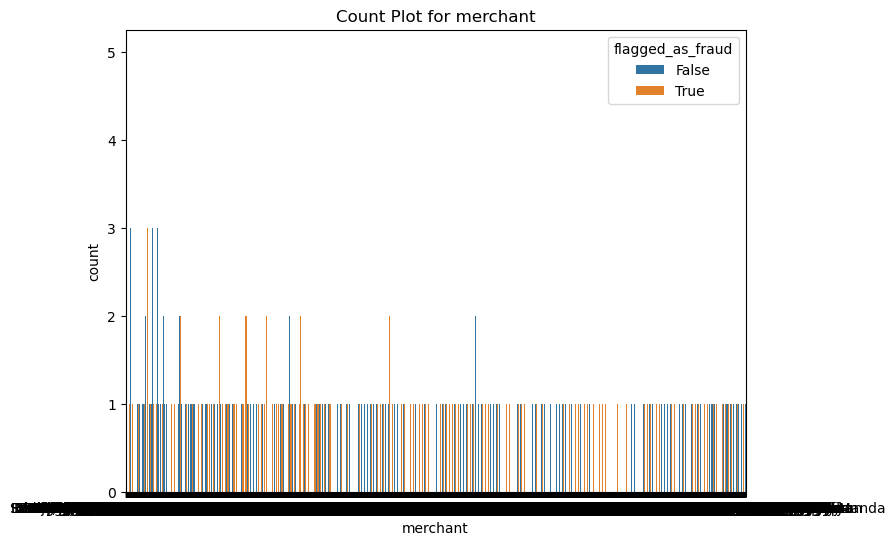


----------------------------------------

Analysis for 'location':
location
Adoni            0.535714
Agartala         0.333333
Agra             0.409091
Ahmedabad        0.566667
Ahmednagar       0.448276
                   ...   
Vijayanagaram    0.500000
Vijayawada       0.542857
Visakhapatnam    0.434783
Warangal         0.611111
Yamunanagar      0.481481
Name: flagged_as_fraud, Length: 316, dtype: float64


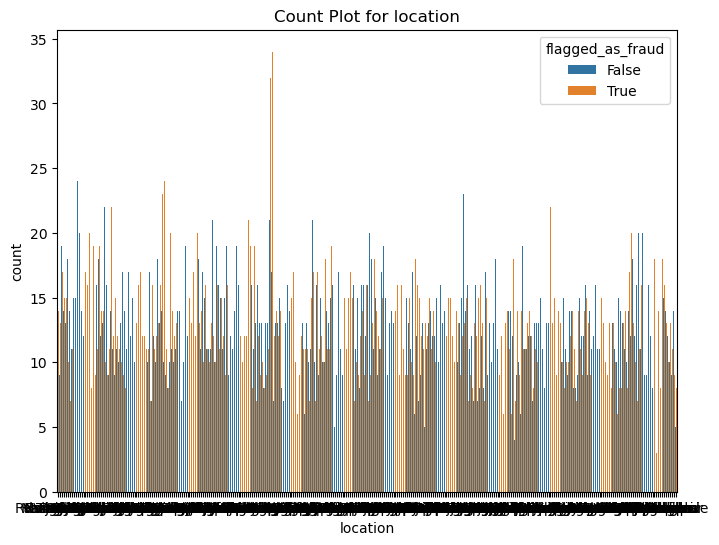


----------------------------------------

Analysis for 'currency':
currency
EUR    0.502650
INR    0.495024
USD    0.498299
Name: flagged_as_fraud, dtype: float64


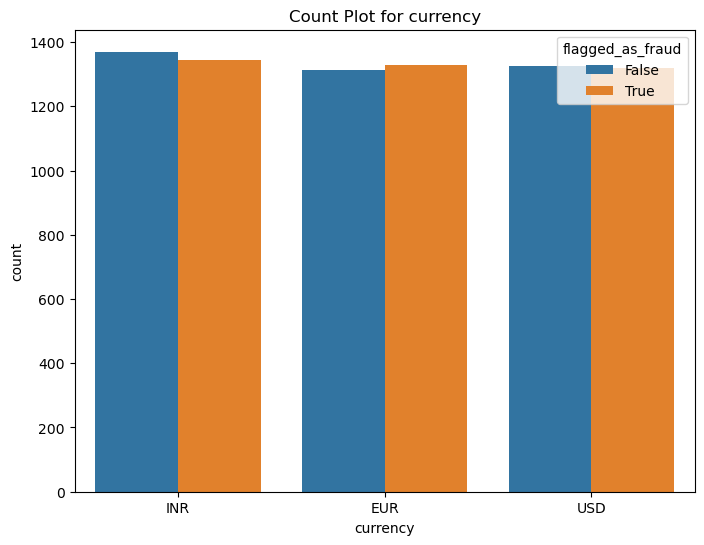


----------------------------------------

Analysis for 'card_type':
card_type
American Express    0.493053
MasterCard          0.490772
Visa                0.511931
Name: flagged_as_fraud, dtype: float64


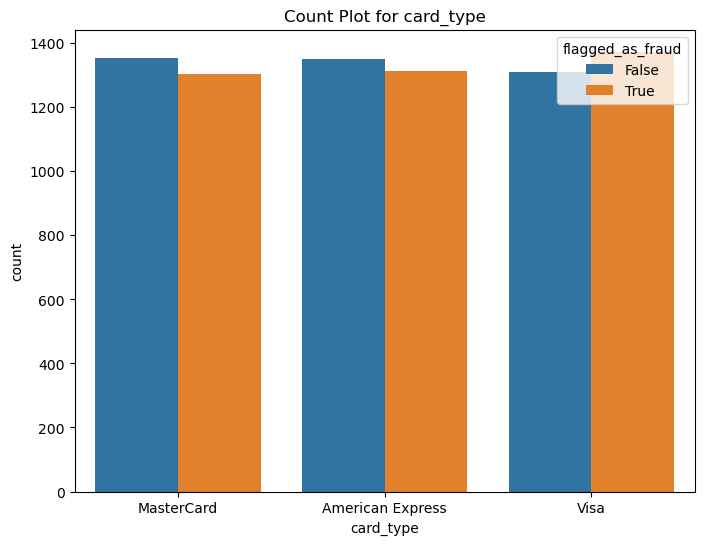


----------------------------------------

Analysis for 'source':
source
In-Person    0.492218
Online       0.505401
Name: flagged_as_fraud, dtype: float64


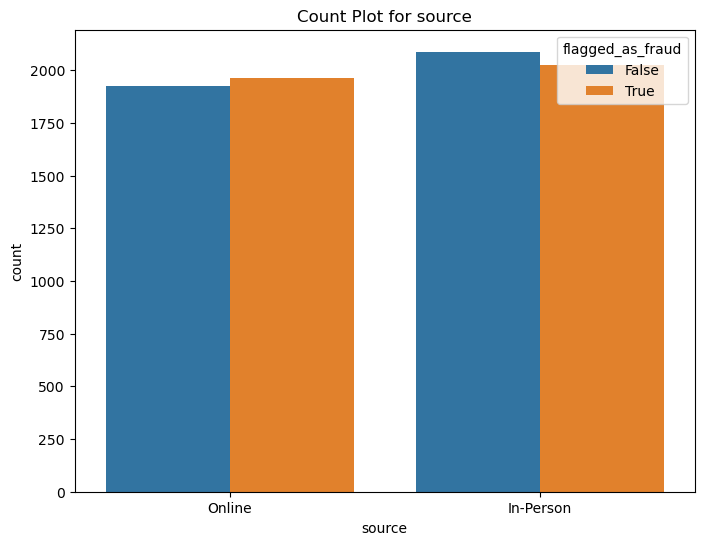


----------------------------------------

Analysis for 'device':
device
Desktop    0.491439
Mobile     0.513910
Tablet     0.491189
Name: flagged_as_fraud, dtype: float64


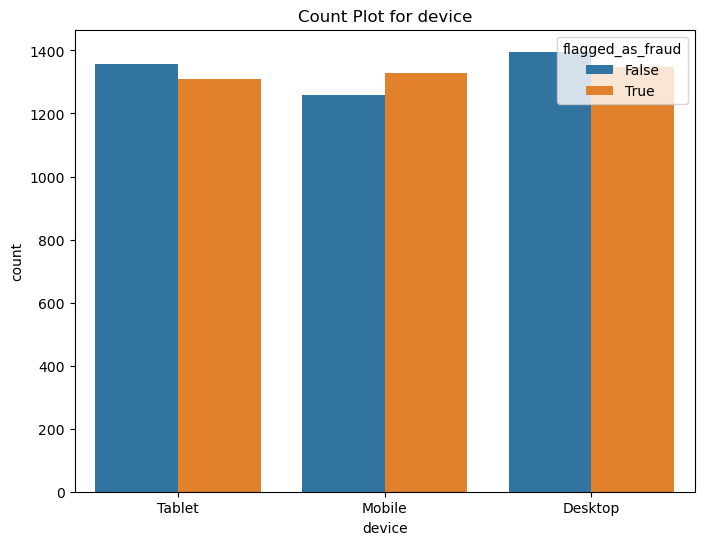


----------------------------------------

Analysis for 'mccgroup':
mccgroup
Agricultural services                                 0.459746
Business services                                     0.515651
Clothing stores                                       0.550000
Contracted services                                   0.495798
Government services                                   0.520833
Miscellaneous stores                                  0.474612
Professional services and membership organizations    0.496495
Retail outlet services                                0.512774
Transportation services                               0.521008
Unknown                                               0.506536
Utility services                                      0.451807
Name: flagged_as_fraud, dtype: float64


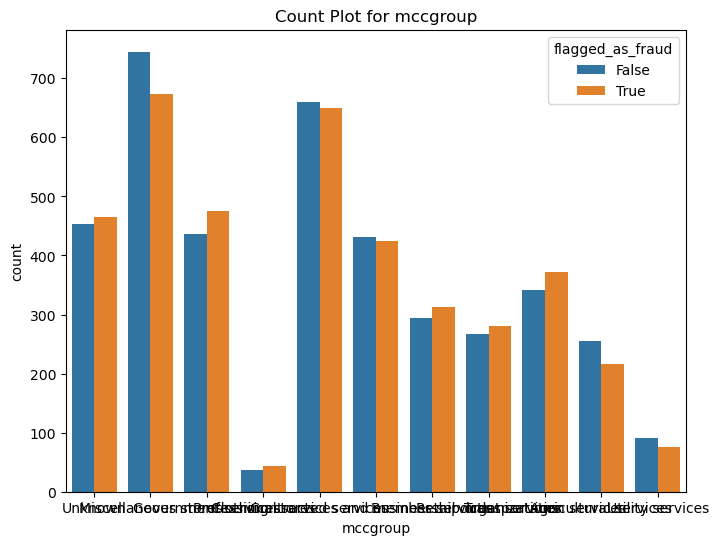


----------------------------------------



In [24]:
# List of string columns
string_columns = df.select_dtypes(include='object').columns

# Loop over each string column
for column in string_columns:
    print(f"Analysis for '{column}':")
    
    # Calculate mean target value for each unique value in the string column
    result = df.groupby(column)['flagged_as_fraud'].mean()
    print(result)

    # Plot a count plot
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='flagged_as_fraud', data=df)
    plt.title(f'Count Plot for {column}')
    plt.show()

    print('\n' + '-'*40 + '\n')

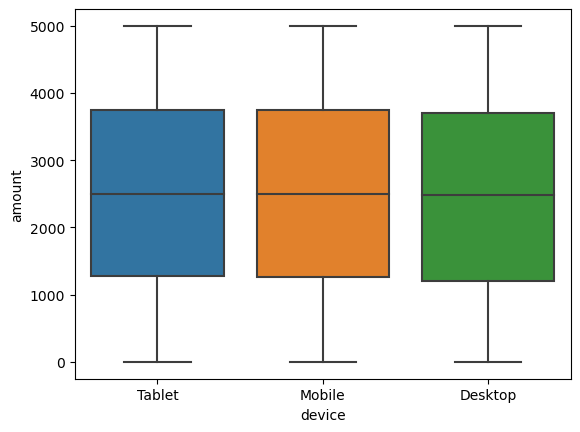

count    8000.000000
mean     2496.356036
std      1451.221326
min         1.090000
25%      1242.580000
50%      2492.460000
75%      3739.522500
max      4996.700000
Name: amount, dtype: float64

In [29]:
sns.boxplot(x = df['device'], y = df['amount'])
plt.show()
df['amount'].describe()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/Users/mattd/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


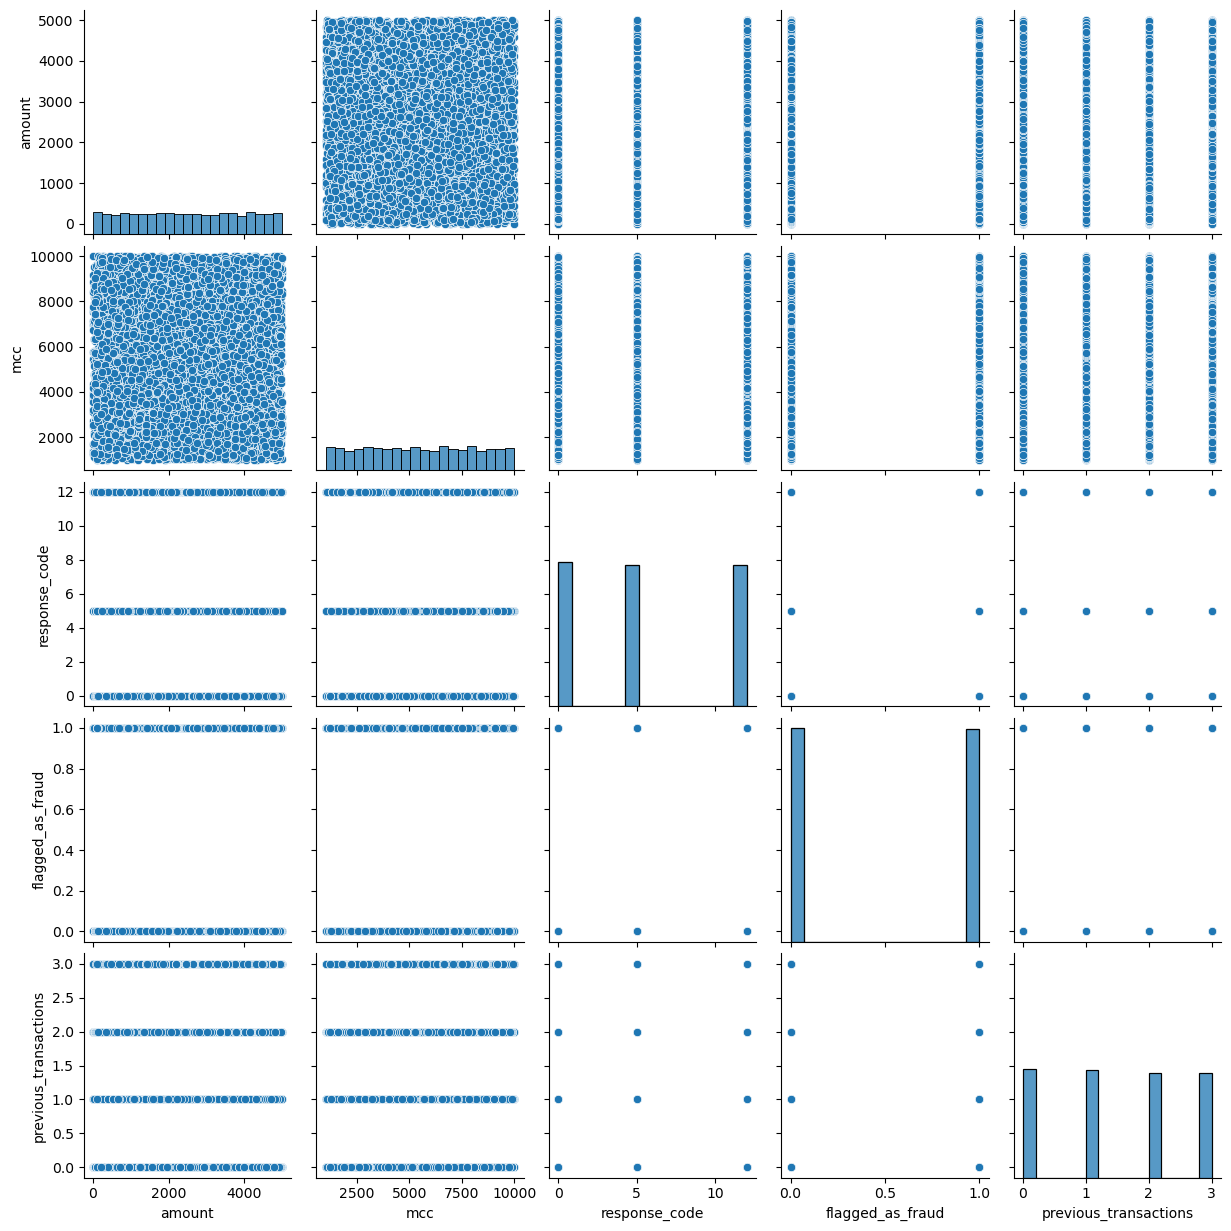

In [30]:
sns.pairplot(df)

<Axes: xlabel='amount', ylabel='Count'>

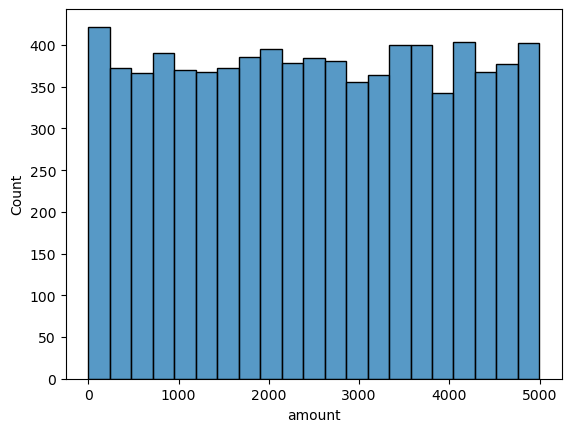

In [31]:
sns.histplot(df['amount'])

In [35]:
df['response_code'].value_counts()

df['response_code'] = df['response_code'].replace({0 : 'Accepted', 12 : 'Declined', 5 : 'Invalid' })

response_code
0     2697
12    2655
5     2648
Name: count, dtype: int64